In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
import numpy as np
import pandas as pd
import seaborn as sns
from plotnine import *
import missingno as msno

In [2]:
import re,os
os.chdir(r'C:\Users\User\OneDrive\문서\python1')

In [3]:
from matplotlib import font_manager,rc
import platform
if platform.system()=='Windows':
    path='c:/Windows/Fonts/malgun.ttf'
    font_name=font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
elif platform.system()=='Darwin':
    rc('font',family='AppleGothic')
else:
    print('Check your Os system')
    

In [4]:
# read_csv() 함수 encoding 속성의 기본값은 'utf-8' 이다. 'utf-8'로 읽어오지 못한다면 encoding 속성값을 'euc-kr', 'cp949',
# 'ms949'로 변경해서 실행한다.
shop = pd.read_csv('shop_2016.csv',encoding="cp949")
shop  

상권명칭  상권번호    관리년월    대분류명    중분류명  과밀지수(밀집도)
0              강릉역광장_2  2523  201601      소매  가전제품소매     1.0818
1                구미역_3  1149  201601      소매  가전제품소매     0.8865
2       전북 전주시 중화산1동_1   768  201601      소매  가전제품소매     1.1757
3              충청북도청_2  1309  201601      소매  가전제품소매     0.3574
4        충북 청주시 복대1동_1  1311  201601      소매  가전제품소매     0.6849
...                ...   ...     ...     ...     ...        ...
805676    경남 양산시 덕계동_1   626  201612      소매     NaN     1.2906
805677   경북 구미시 신평1동_2  1143  201612  업종분류불능     NaN     0.5677
805678           안양역_5  1663  201612      소매     NaN     1.6597
805679             양산역   616  201612      소매     NaN     1.4103
805680           망포역_2  1473  201612  업종분류불능     NaN     0.7113

[805681 rows x 6 columns]

In [5]:
shop_201806 = pd.read_csv('shop_201806_01.csv', encoding='cp949')
shop_201806.shape

(499328, 39)

In [6]:
shop_201806.head()

상가업소번호            상호명         지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  상권업종중분류명  \
0  19905471         와라와라호프         NaN         Q       음식       Q09      유흥주점   
1  19911397  커피빈코리아선릉로93길점  코리아선릉로93길점         Q       음식       Q12    커피점/카페   
2  19911801           프로포즈         NaN         Q       음식       Q09      유흥주점   
3  19912201       싱싱커피&토스트         NaN         Q       음식       Q07     패스트푸드   
4  19932756       가락사우나내스낵         NaN         F    생활서비스       F09  대중목욕탕/휴게   

  상권업종소분류코드     상권업종소분류명 표준산업분류코드  ...                     건물관리번호       건물명  \
0    Q09A01        호프/맥주   I56219  ...  1168010600106040000014378      대치상가   
1    Q12A01  커피전문점/카페/다방   I56220  ...  1168010100106960042022041       NaN   
2    Q09A01        호프/맥주   I56219  ...  1154510200101620001017748       NaN   
3    Q07A10        토스트전문   I56192  ...  2653010400105780000002037  산업용품유통상가   
4    F09A02   사우나/증기탕/온천   S96121  ...  1171010500102560005010490       NaN   

                  도로명주소   구우편번호    신우편번호  동정보 층정보  호정보          경도         위도  
0  서울특별시 강남구 남부순환로 2933  135280   6280.0  NaN   1  NaN  127.061026  37.493922  
1    서울특별시 강남구 선릉로93길 6  135080   6149.0  NaN   1  NaN  127.047883  37.505675  
2    서울특별시 금천구 가산로 34-6  153010   8545.0  NaN   1  NaN  126.899220  37.471711  
3      부산광역시 사상구 괘감로 37  617726  46977.0  NaN   1   26  128.980455  35.159774  
4      서울특별시 송파구 가락로 71  138846   5690.0  NaN   1  NaN  127.104071  37.500249  

[5 rows x 39 columns]

In [7]:
shop_201806.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [8]:
# 분석 작업에 필요한 column만 추려낸다.
view_columns = ['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '시도명', '시군구명',
               '행정동명', '법정동명', '지번주소', '도로명주소', '경도', '위도']
shop_2018_06 = shop_201806[view_columns]
shop_2018_06

상호명         지점명 상권업종대분류명  상권업종중분류명     상권업종소분류명    시도명 시군구명  \
0              와라와라호프         NaN       음식      유흥주점        호프/맥주  서울특별시  강남구   
1       커피빈코리아선릉로93길점  코리아선릉로93길점       음식    커피점/카페  커피전문점/카페/다방  서울특별시  강남구   
2                프로포즈         NaN       음식      유흥주점        호프/맥주  서울특별시  금천구   
3            싱싱커피&토스트         NaN       음식     패스트푸드        토스트전문  부산광역시  사상구   
4            가락사우나내스낵         NaN    생활서비스  대중목욕탕/휴게   사우나/증기탕/온천  서울특별시  송파구   
...               ...         ...      ...       ...          ...    ...  ...   
499323       배스킨라빈스31     건대스타시티점       음식     패스트푸드      아이스크림판매  서울특별시  광진구   
499324           본도시락        본설렁탕       음식        한식         설렁탕집  서울특별시  강동구   
499325         체크페이먼트         NaN       음식    커피점/카페  커피전문점/카페/다방  서울특별시  강남구   
499326          마젠타네일         NaN    생활서비스   이/미용/건강       발/네일케어  서울특별시  마포구   
499327           GS25       역촌대로점       소매     종합소매점          편의점  서울특별시  은평구   

        행정동명 법정동명                  지번주소                 도로명주소          경도  \
0       대치1동  대치동     서울특별시 강남구 대치동 604  서울특별시 강남구 남부순환로 2933  127.061026   
1       역삼1동  역삼동  서울특별시 강남구 역삼동 696-42    서울특별시 강남구 선릉로93길 6  127.047883   
2       독산3동  독산동   서울특별시 금천구 독산동 162-1    서울특별시 금천구 가산로 34-6  126.899220   
3        괘법동  괘법동     부산광역시 사상구 괘법동 578      부산광역시 사상구 괘감로 37  128.980455   
4        석촌동  석촌동     서울특별시 송파구 석촌동 256      서울특별시 송파구 가락로 71  127.104071   
...      ...  ...                   ...                   ...         ...   
499323  자양3동  자양동   서울특별시 광진구 자양동 227-7    서울특별시 광진구 아차산로 262  127.072944   
499324   강일동  상일동     서울특별시 강동구 상일동 502    서울특별시 강동구 상일로6길 39  127.175331   
499325  대치4동  대치동     서울특별시 강남구 대치동 905   서울특별시 강남구 역삼로69길 10  127.054001   
499326   아현동  공덕동     서울특별시 마포구 공덕동 463    서울특별시 마포구 마포대로 173  126.954442   
499327   역촌동  역촌동     서울특별시 은평구 역촌동 9-7      서울특별시 은평구 연서로 92  126.915538   

               위도  
0       37.493922  
1       37.505675  
2       37.471711  
3       35.159774  
4       37.500249  
...           ...  
499323  37.536997  
499324  37.549794  
499325  37.502210  
499326  37.549892  
499327  37.607334  

[499328 rows x 13 columns]

In [9]:
shop_201806.isnull().sum()

상가업소번호            0
상호명               1
지점명          432587
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      28731
표준산업분류명       28731
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         86552
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        434501
건물관리번호            0
건물명          274150
도로명주소             0
구우편번호             0
신우편번호             9
동정보          455420
층정보          191133
호정보          427356
경도                0
위도                0
dtype: int64

<AxesSubplot:>

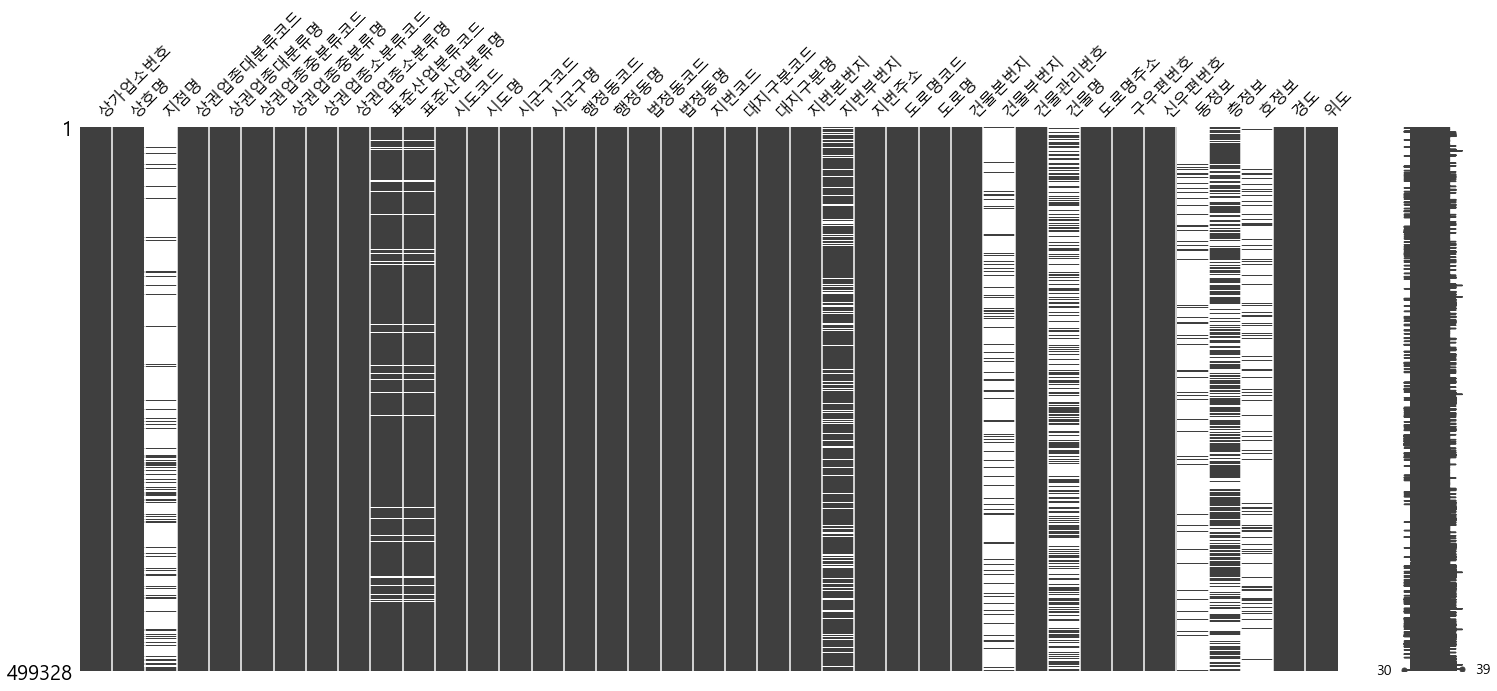

In [10]:
msno.matrix(shop_201806)

<AxesSubplot:>

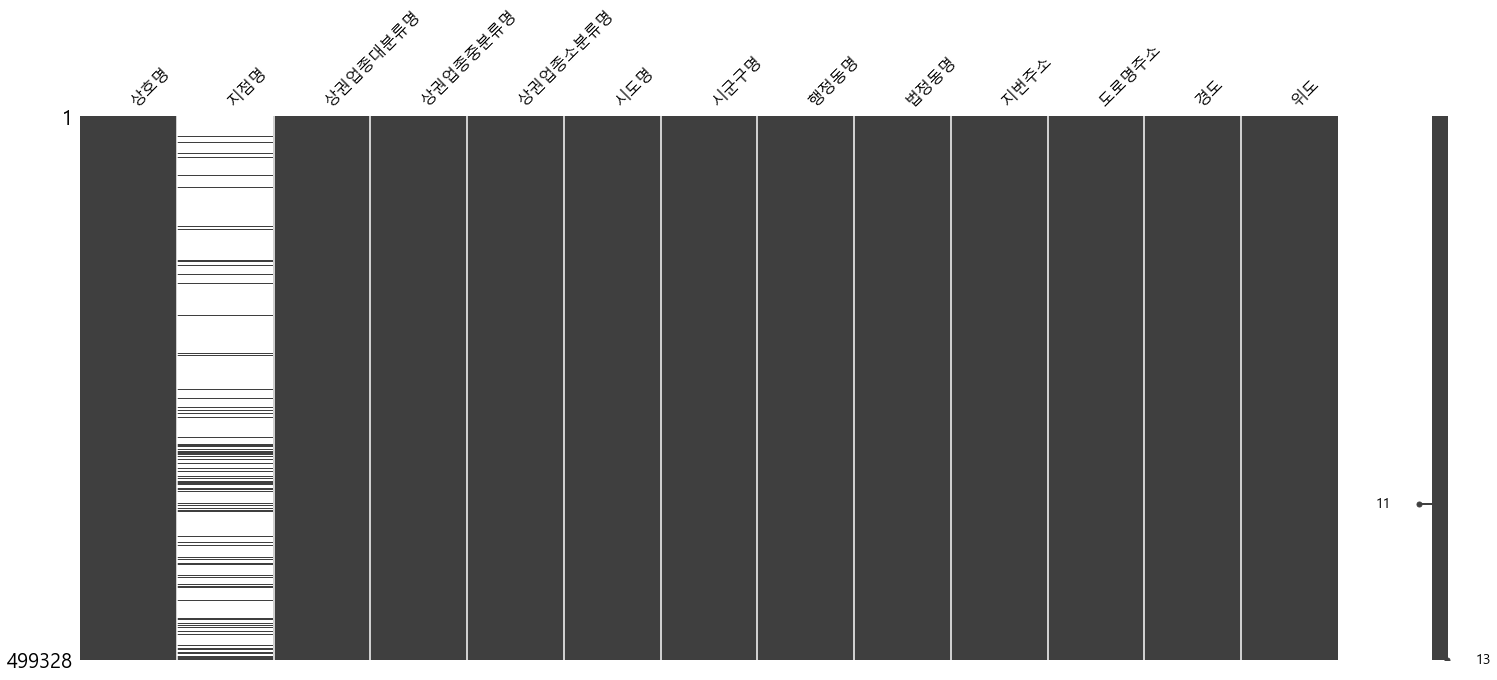

In [11]:
msno.matrix(shop_2018_06)

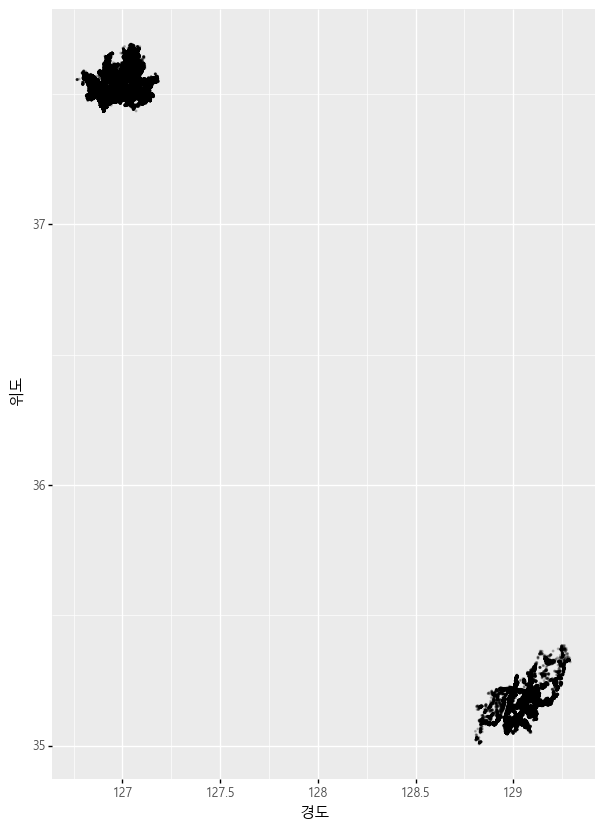

<ggplot: (131560429963)>

In [17]:
ggplot(shop_2018_06, aes(x='경도', y='위도')) \
    + geom_point(size=0.2, alpha=0.2) \
    + theme(text=element_text(family=font_name), figure_size=(7, 10))

<AxesSubplot:xlabel='경도', ylabel='위도'>

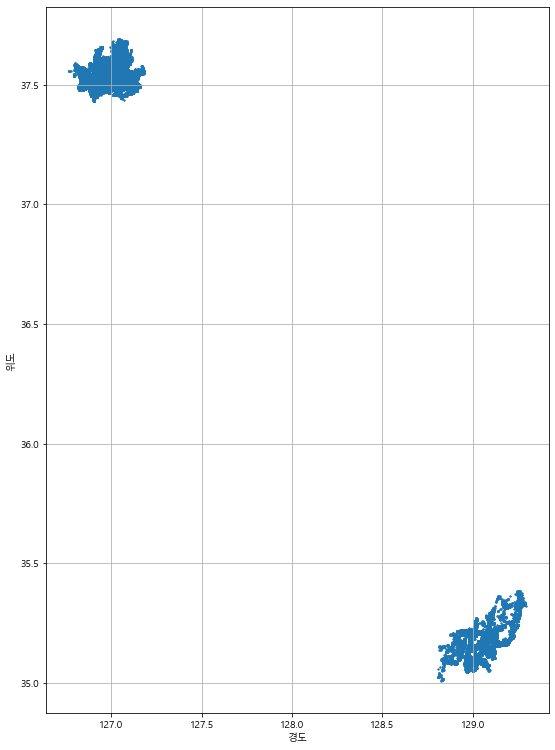

In [18]:
shop_2018_06.plot.scatter(x='경도', y='위도', grid=True, figsize=(9, 13), s=2)

In [19]:
# 데이터를 시각화 시켜보니 서울과 부산만 있는것 같다. 그래서 서울과 그 이외의 데이터로 나눈다.
# shop_2018_06[shop_2018_06['시도명'] == '서울특별시'] # 시도명이 서울특별시인 데이터만 얻어온다.
# shop_2018_06[shop_2018_06['지번주소'].str.startswith('서울')] # 지번주소가 서울로 시작하는 데이터만 얻어온다.
shop_seoul = shop_2018_06[shop_2018_06['도로명주소'].str.startswith('서울')] # 도로명주소가 서울로 시작하는 데이터만 얻어온다.
shop_seoul

상호명         지점명 상권업종대분류명  상권업종중분류명     상권업종소분류명    시도명 시군구명  \
0              와라와라호프         NaN       음식      유흥주점        호프/맥주  서울특별시  강남구   
1       커피빈코리아선릉로93길점  코리아선릉로93길점       음식    커피점/카페  커피전문점/카페/다방  서울특별시  강남구   
2                프로포즈         NaN       음식      유흥주점        호프/맥주  서울특별시  금천구   
4            가락사우나내스낵         NaN    생활서비스  대중목욕탕/휴게   사우나/증기탕/온천  서울특별시  송파구   
5                허술한집         NaN       음식        분식       라면김밥분식  서울특별시  강서구   
...               ...         ...      ...       ...          ...    ...  ...   
499323       배스킨라빈스31     건대스타시티점       음식     패스트푸드      아이스크림판매  서울특별시  광진구   
499324           본도시락        본설렁탕       음식        한식         설렁탕집  서울특별시  강동구   
499325         체크페이먼트         NaN       음식    커피점/카페  커피전문점/카페/다방  서울특별시  강남구   
499326          마젠타네일         NaN    생활서비스   이/미용/건강       발/네일케어  서울특별시  마포구   
499327           GS25       역촌대로점       소매     종합소매점          편의점  서울특별시  은평구   

        행정동명 법정동명                  지번주소                 도로명주소          경도  \
0       대치1동  대치동     서울특별시 강남구 대치동 604  서울특별시 강남구 남부순환로 2933  127.061026   
1       역삼1동  역삼동  서울특별시 강남구 역삼동 696-42    서울특별시 강남구 선릉로93길 6  127.047883   
2       독산3동  독산동   서울특별시 금천구 독산동 162-1    서울특별시 금천구 가산로 34-6  126.899220   
4        석촌동  석촌동     서울특별시 송파구 석촌동 256      서울특별시 송파구 가락로 71  127.104071   
5        공항동  공항동   서울특별시 강서구 공항동 45-89    서울특별시 강서구 공항대로3길 9  126.809957   
...      ...  ...                   ...                   ...         ...   
499323  자양3동  자양동   서울특별시 광진구 자양동 227-7    서울특별시 광진구 아차산로 262  127.072944   
499324   강일동  상일동     서울특별시 강동구 상일동 502    서울특별시 강동구 상일로6길 39  127.175331   
499325  대치4동  대치동     서울특별시 강남구 대치동 905   서울특별시 강남구 역삼로69길 10  127.054001   
499326   아현동  공덕동     서울특별시 마포구 공덕동 463    서울특별시 마포구 마포대로 173  126.954442   
499327   역촌동  역촌동     서울특별시 은평구 역촌동 9-7      서울특별시 은평구 연서로 92  126.915538   

               위도  
0       37.493922  
1       37.505675  
2       37.471711  
4       37.500249  
5       37.562013  
...           ...  
499323  37.536997  
499324  37.549794  
499325  37.502210  
499326  37.549892  
499327  37.607334  

[345268 rows x 13 columns]

In [20]:
# '~'는 ~가 아닌것을 의미한다.
shop_except_seoul = shop_2018_06[~shop_2018_06['도로명주소'].str.startswith('서울')]
shop_except_seoul

상호명   지점명 상권업종대분류명   상권업종중분류명   상권업종소분류명    시도명  시군구명  행정동명  \
3       싱싱커피&토스트   NaN       음식      패스트푸드      토스트전문  부산광역시   사상구   괘법동   
22        경부할인마트   NaN       소매      종합소매점       종합소매  부산광역시    동구  초량6동   
23           마니쩜   NaN       음식       유흥주점      호프/맥주  부산광역시  부산진구  가야1동   
24         경주아구찜   NaN       음식     일식/수산물       아구전문  부산광역시   수영구  남천1동   
30      동해제일산오징어   NaN       음식     일식/수산물     낙지/오징어  부산광역시   동래구  온천3동   
...          ...   ...      ...        ...        ...    ...   ...   ...   
499305      보라헤어   NaN    생활서비스    이/미용/건강      여성미용실  부산광역시   사상구  주례2동   
499310    호텔엘레펀트   NaN       숙박  모텔/여관/여인숙  모텔/여관/여인숙  부산광역시  부산진구  부전2동   
499311      포항물회   7.7       음식     일식/수산물         횟집  부산광역시   영도구   남항동   
499318       참누리   NaN    생활서비스   세탁/가사서비스      청소/소독  부산광역시  해운대구   좌3동   
499321     봉수아피자  연산동점       음식      패스트푸드       피자전문  부산광역시   연제구  연산8동   

         법정동명                   지번주소                        도로명주소          경도  \
3         괘법동      부산광역시 사상구 괘법동 578             부산광역시 사상구 괘감로 37  128.980455   
22        초량동   부산광역시 동구 초량동 794-681             부산광역시 동구 망양로 593  129.034599   
23        가야동   부산광역시 부산진구 가야동 450-2          부산광역시 부산진구 대학로 64-1  129.034302   
24        남천동   부산광역시 수영구 남천동 357-10          부산광역시 수영구 수영로 381-8  129.106330   
30        온천동   부산광역시 동래구 온천동 1380-2     부산광역시 동래구 아시아드대로220번길 30  129.068324   
...       ...                    ...                          ...         ...   
499305    주례동     부산광역시 사상구 주례동 3-16       부산광역시 사상구 백양대로342번길 22  129.014460   
499310    부전동  부산광역시 부산진구 부전동 519-36  부산광역시 부산진구 중앙대로691번가길 24-12  129.056079   
499311  대교동1가  부산광역시 영도구 대교동1가 106-7       부산광역시 영도구 절영로36번길 14-1  129.038401   
499318     좌동     부산광역시 해운대구 좌동 1375      부산광역시 해운대구 좌동순환로99번길 22  129.166905   
499321    연산동   부산광역시 연제구 연산동 339-14             부산광역시 연제구 연동로 21  129.093382   

               위도  
3       35.159774  
22      35.123196  
23      35.150069  
24      35.141176  
30      35.202902  
...           ...  
499305  35.154509  
499310  35.155344  
499311  35.091686  
499318  35.177375  
499321  35.187174  

[154060 rows x 13 columns]

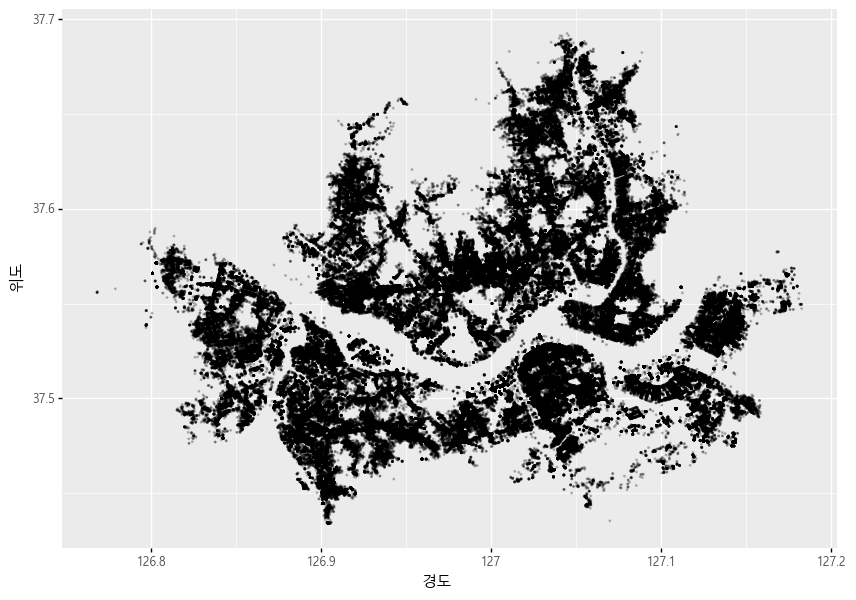

<ggplot: (131552403444)>

In [21]:
ggplot(shop_seoul, aes(x='경도', y='위도')) \
    + geom_point(size=0.2, alpha=0.2) \
    + theme(text=element_text(family=font_name), figure_size=(10, 7))

<AxesSubplot:xlabel='경도', ylabel='위도'>

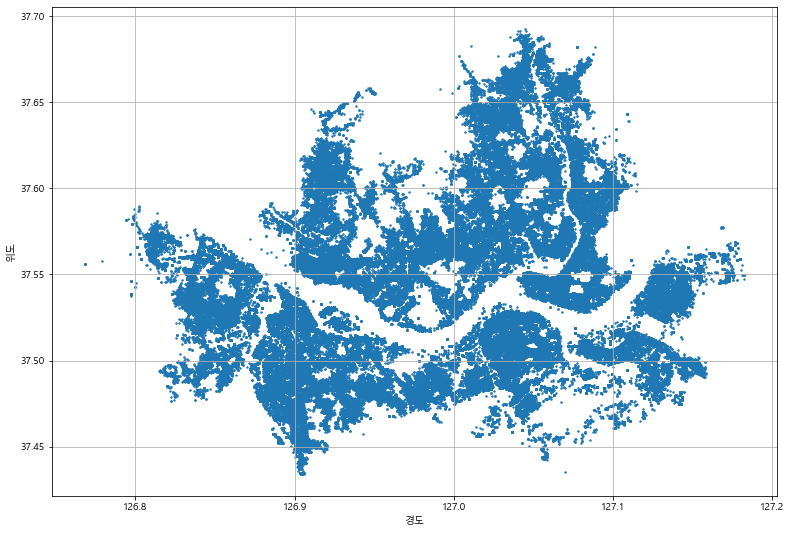

In [22]:
shop_seoul.plot.scatter(x='경도', y='위도', grid=True, figsize=(13, 9), s=2)

In [23]:
# 데이터프레임의 도로명주소를 활용해서 '시도', '구군' 열을 만든다.
# split() 함수에 expend=True 옵션을 지정해서 구분자를 경계로 문자열을 서로 다른 열(데이터프레임)으로 구분해서 '시도' 열과
# '구군' 열을 만든다.
# print(type(shop_seoul[:1]['도로명주소'].str.split(' ', expand=True)))
# print(shop_seoul[:1]['도로명주소'].str.split(' ', expand=True)[0]) # 시도
# print(shop_seoul[:1]['도로명주소'].str.split(' ', expand=True)[1]) # 구군

shop_2018_06['시도'] = shop_2018_06['도로명주소'].str.split(' ', expand=True)[0]
shop_2018_06['구군'] = shop_2018_06['도로명주소'].str.split(' ', expand=True)[1]
shop_2018_06.columns

Index(['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '시도명', '시군구명', '행정동명',
       '법정동명', '지번주소', '도로명주소', '경도', '위도', '시도', '구군'],
      dtype='object')

In [24]:
# '시도' 열과 '구군' 열이 추가된 원본 데이터프레임에서 서울 데이터만 추출해서 다시 데이터프레임으로 만들어준다.
shop_seoul = shop_2018_06[shop_2018_06['도로명주소'].str.startswith('서울')]
shop_seoul

상호명         지점명 상권업종대분류명  상권업종중분류명     상권업종소분류명    시도명 시군구명  \
0              와라와라호프         NaN       음식      유흥주점        호프/맥주  서울특별시  강남구   
1       커피빈코리아선릉로93길점  코리아선릉로93길점       음식    커피점/카페  커피전문점/카페/다방  서울특별시  강남구   
2                프로포즈         NaN       음식      유흥주점        호프/맥주  서울특별시  금천구   
4            가락사우나내스낵         NaN    생활서비스  대중목욕탕/휴게   사우나/증기탕/온천  서울특별시  송파구   
5                허술한집         NaN       음식        분식       라면김밥분식  서울특별시  강서구   
...               ...         ...      ...       ...          ...    ...  ...   
499323       배스킨라빈스31     건대스타시티점       음식     패스트푸드      아이스크림판매  서울특별시  광진구   
499324           본도시락        본설렁탕       음식        한식         설렁탕집  서울특별시  강동구   
499325         체크페이먼트         NaN       음식    커피점/카페  커피전문점/카페/다방  서울특별시  강남구   
499326          마젠타네일         NaN    생활서비스   이/미용/건강       발/네일케어  서울특별시  마포구   
499327           GS25       역촌대로점       소매     종합소매점          편의점  서울특별시  은평구   

        행정동명 법정동명                  지번주소                 도로명주소          경도  \
0       대치1동  대치동     서울특별시 강남구 대치동 604  서울특별시 강남구 남부순환로 2933  127.061026   
1       역삼1동  역삼동  서울특별시 강남구 역삼동 696-42    서울특별시 강남구 선릉로93길 6  127.047883   
2       독산3동  독산동   서울특별시 금천구 독산동 162-1    서울특별시 금천구 가산로 34-6  126.899220   
4        석촌동  석촌동     서울특별시 송파구 석촌동 256      서울특별시 송파구 가락로 71  127.104071   
5        공항동  공항동   서울특별시 강서구 공항동 45-89    서울특별시 강서구 공항대로3길 9  126.809957   
...      ...  ...                   ...                   ...         ...   
499323  자양3동  자양동   서울특별시 광진구 자양동 227-7    서울특별시 광진구 아차산로 262  127.072944   
499324   강일동  상일동     서울특별시 강동구 상일동 502    서울특별시 강동구 상일로6길 39  127.175331   
499325  대치4동  대치동     서울특별시 강남구 대치동 905   서울특별시 강남구 역삼로69길 10  127.054001   
499326   아현동  공덕동     서울특별시 마포구 공덕동 463    서울특별시 마포구 마포대로 173  126.954442   
499327   역촌동  역촌동     서울특별시 은평구 역촌동 9-7      서울특별시 은평구 연서로 92  126.915538   

               위도     시도   구군  
0       37.493922  서울특별시  강남구  
1       37.505675  서울특별시  강남구  
2       37.471711  서울특별시  금천구  
4       37.500249  서울특별시  송파구  
5       37.562013  서울특별시  강서구  
...           ...    ...  ...  
499323  37.536997  서울특별시  광진구  
499324  37.549794  서울특별시  강동구  
499325  37.502210  서울특별시  강남구  
499326  37.549892  서울특별시  마포구  
499327  37.607334  서울특별시  은평구  

[345268 rows x 15 columns]

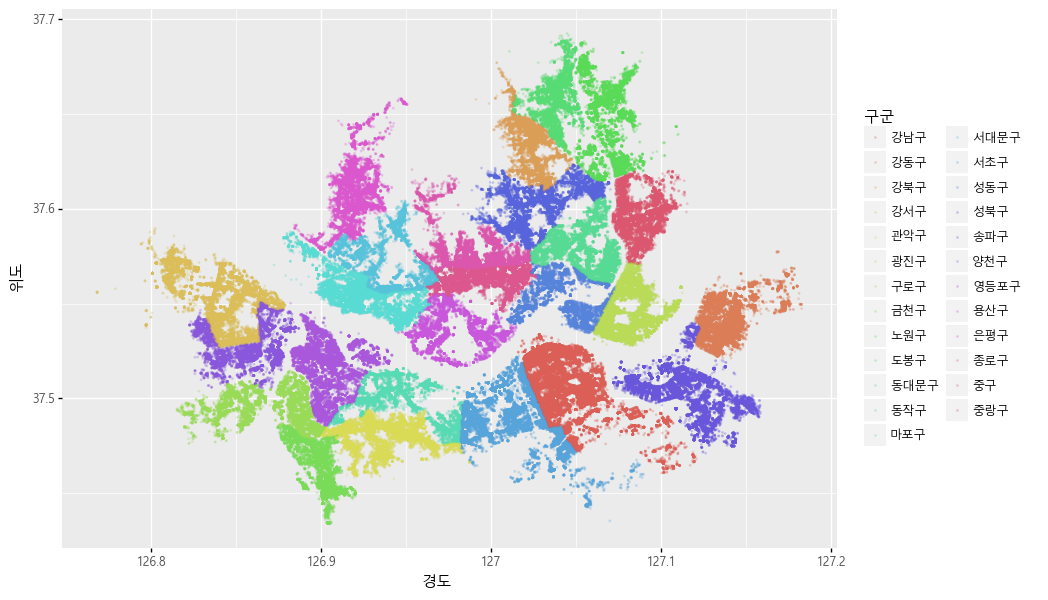

<ggplot: (131558584857)>

In [25]:
ggplot(shop_seoul, aes(x='경도', y='위도', color='구군')) \
    + geom_point(size=0.2, alpha=0.2) \
    + theme(text=element_text(family=font_name), figure_size=(10, 7))

In [27]:
import matplotlib.pyplot as plt


<AxesSubplot:xlabel='경도', ylabel='위도'>

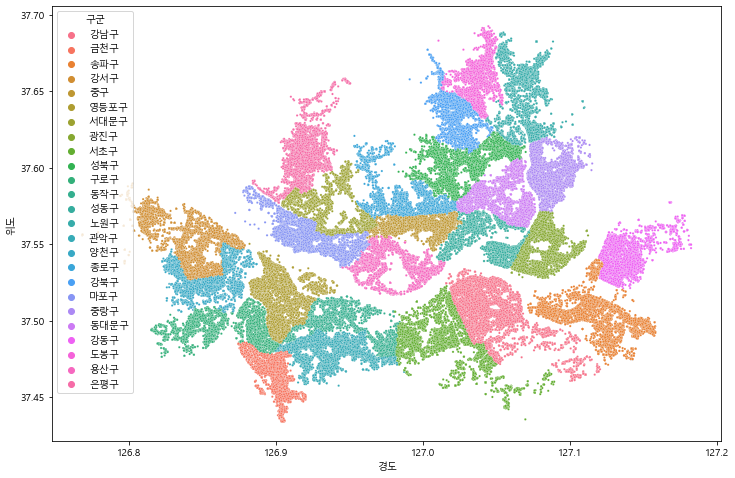

In [28]:
# seaborn 라이브러리를 이용한 시각화
plt.figure(figsize=(12, 8))
sns.scatterplot(data=shop_seoul, x='경도', y='위도', hue='구군', s=5)

<AxesSubplot:xlabel='경도', ylabel='위도'>

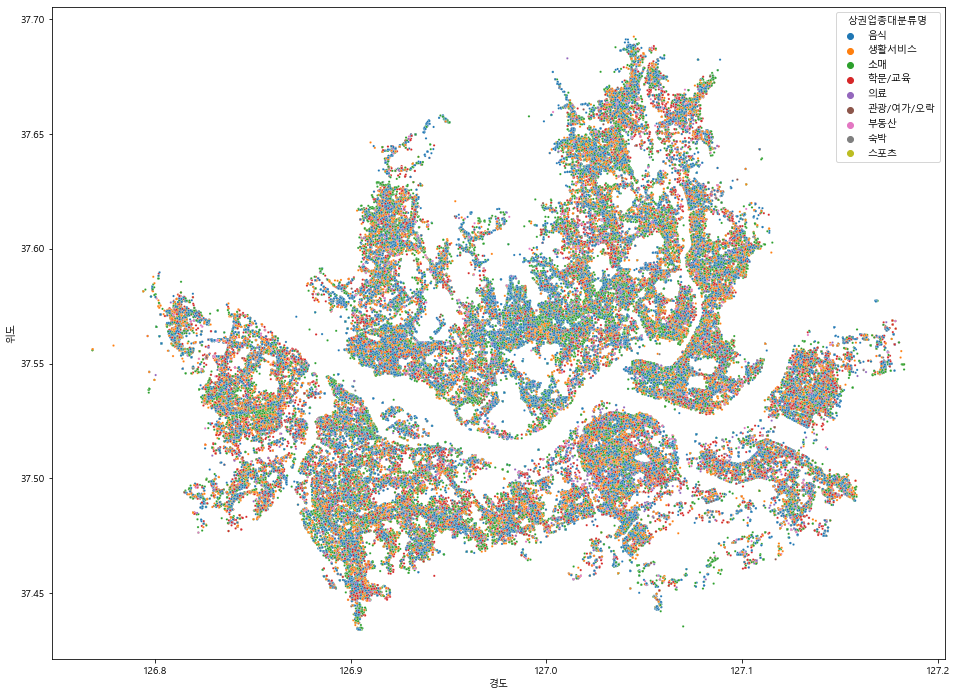

In [29]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=shop_seoul, x='경도', y='위도', hue='상권업종대분류명', s=5)

In [30]:
# 학문/교육과 관련된 정보 보기
shop_seoul_edu = shop_seoul[shop_seoul['상권업종대분류명'] == '학문/교육']
shop_seoul_edu

상호명      지점명 상권업종대분류명    상권업종중분류명   상권업종소분류명    시도명  시군구명  행정동명  \
52         안재형영어      NaN    학문/교육       학원-어학  학원-외국어/어학  서울특별시   양천구   목5동   
67           정아트      NaN    학문/교육   학원-음악미술무용   서예/서화/미술  서울특별시   강서구   염창동   
86      GIA보석교육원      NaN    학문/교육  학원-자격/국가고시    학원-보석감정  서울특별시   강남구  압구정동   
120        경찰태권도      NaN    학문/교육   학원-예능취미체육       태권도장  서울특별시   성북구  길음1동   
142      파랑새어린이집      NaN    학문/교육        유아교육       어린이집  서울특별시   도봉구   창1동   
...          ...      ...      ...         ...        ...    ...   ...   ...   
499268     점프셈교실     뉴스터디    학문/교육   학원-보습교습입시      학원-입시  서울특별시   강서구   염창동   
499278     점프셈교실  IPN보떼미용    학문/교육   학원-창업취업취미    학원-네일아트  서울특별시   강동구  천호2동   
499288     점프셈교실    온누리보습    학문/교육   학원-보습교습입시      학원-입시  서울특별시   관악구   미성동   
499289     점프셈교실    일신제2관    학문/교육   학원-보습교습입시      학원-입시  서울특별시  영등포구  양평1동   
499315     점프셈교실    키스톤보습    학문/교육   학원-보습교습입시      학원-입시  서울특별시   관악구   조원동   

         법정동명                   지번주소                 도로명주소          경도  \
52         목동    서울특별시 양천구 목동 905-34  서울특별시 양천구 목동서로 133-2  126.875973   
67        염창동    서울특별시 강서구 염창동 184-8  서울특별시 강서구 양천로73가길 21  126.873645   
86        신사동    서울특별시 강남구 신사동 639-3    서울특별시 강남구 압구정로 320  127.036437   
120       길음동   서울특별시 성북구 길음동 1283-4      서울특별시 성북구 길음로 20  127.023020   
142        창동       서울특별시 도봉구 창동 374     서울특별시 도봉구 덕릉로 329  127.045486   
...       ...                    ...                   ...         ...   
499268    염창동   서울특별시 강서구 염창동 242-29     서울특별시 강서구 양천로 623  126.867243   
499278    천호동    서울특별시 강동구 천호동 456-2    서울특별시 강동구 천호대로 993  127.122785   
499288    신림동    서울특별시 관악구 신림동 753-2  서울특별시 관악구 문성로16가길 43  126.914883   
499289  양평동1가  서울특별시 영등포구 양평동1가 9-32     서울특별시 영등포구 선유로 88  126.890194   
499315    신림동   서울특별시 관악구 신림동 1652-9     서울특별시 관악구 조원로6길 1  126.905305   

               위도     시도    구군  
52      37.531592  서울특별시   양천구  
67      37.550924  서울특별시   강서구  
86      37.528532  서울특별시   강남구  
120     37.604749  서울특별시   성북구  
142     37.644831  서울특별시   도봉구  
...           ...    ...   ...  
499268  37.554476  서울특별시   강서구  
499278  37.539198  서울특별시   강동구  
499288  37.475271  서울특별시   관악구  
499289  37.521725  서울특별시  영등포구  
499315  37.483139  서울특별시   관악구  

[27717 rows x 15 columns]

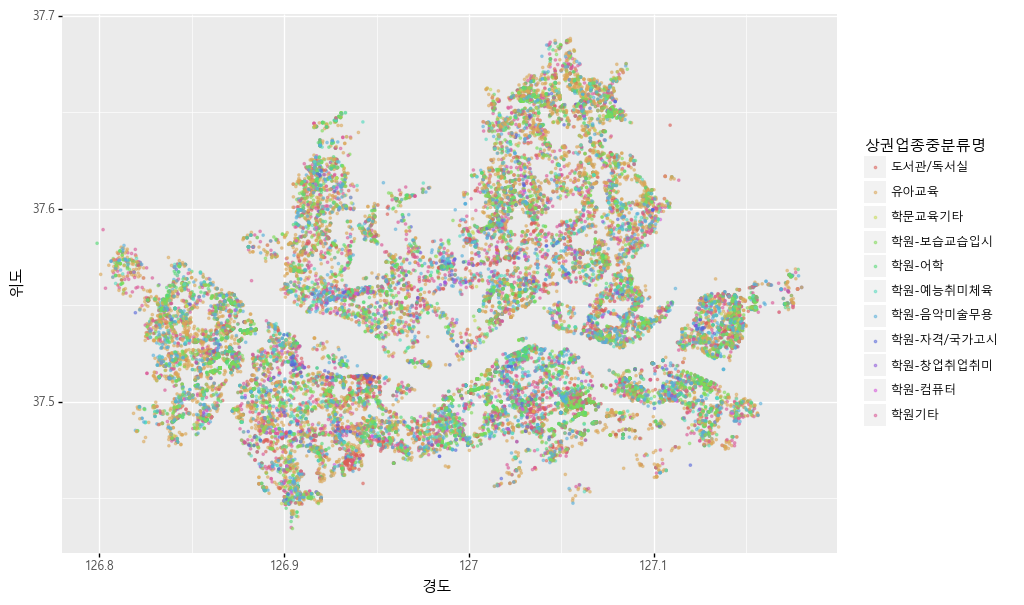

<ggplot: (131592452286)>

In [31]:
ggplot(shop_seoul_edu, aes(x='경도', y='위도', color='상권업종중분류명')) \
    + geom_point(size=0.5, alpha=0.5) \
    + theme(text=element_text(family=font_name), figure_size=(10, 7))

<AxesSubplot:xlabel='경도', ylabel='위도'>

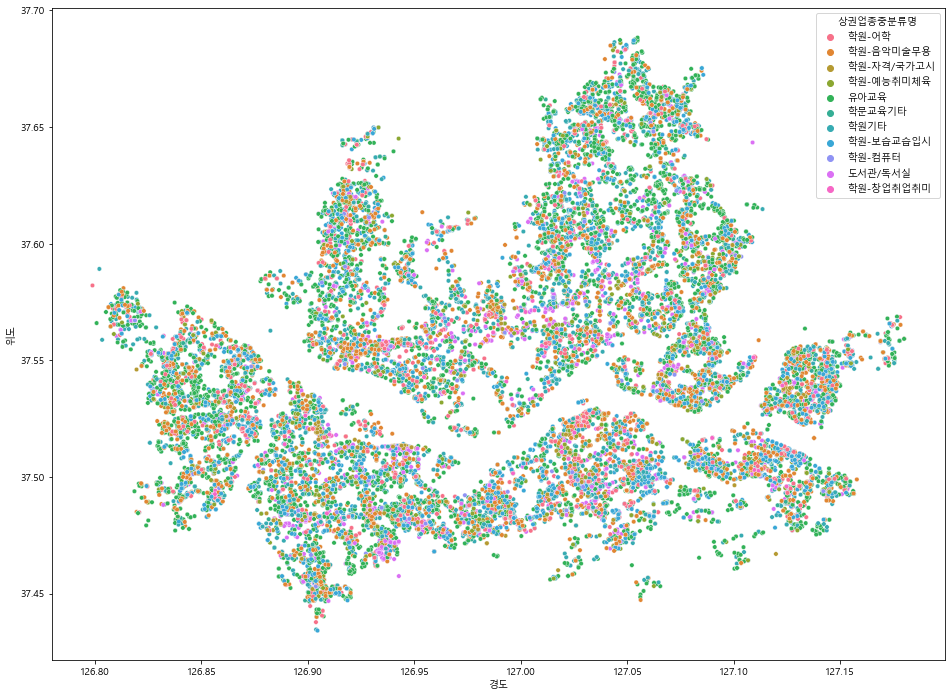

In [32]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=shop_seoul_edu, x='경도', y='위도', hue='상권업종중분류명', s=20)

In [33]:
# 부동산과 관련된 정보 보기
shop_seoul_realty = shop_seoul[shop_seoul['상권업종대분류명'] == '부동산']
shop_seoul_realty

상호명  지점명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명 시군구명  행정동명 법정동명  \
127        화랑공인중개사사무소  NaN      부동산    부동산중개    부동산중개  서울특별시  노원구  공릉2동  공릉동   
145        반석공인중개사사무소  NaN      부동산    부동산중개    부동산중개  서울특별시  강동구  명일1동  명일동   
153     부동산명가공인중개사사무소  NaN      부동산    부동산중개    부동산중개  서울특별시  송파구   삼전동  삼전동   
155        강변공인중개사사무소  NaN      부동산    부동산중개    부동산중개  서울특별시  서초구   잠원동  잠원동   
160             중앙부동산  NaN      부동산    부동산중개    부동산중개  서울특별시  서초구  반포2동  반포동   
...               ...  ...      ...      ...      ...    ...  ...   ...  ...   
498113         고수경부동산  NaN      부동산    부동산중개    부동산중개  서울특별시  강남구  개포4동  개포동   
498230             희망  NaN      부동산    부동산중개    부동산중개  서울특별시  광진구  자양3동  자양동   
498232          중앙부동산  NaN      부동산    부동산중개    부동산중개  서울특별시  금천구  시흥5동  시흥동   
498307          진주부동산  NaN      부동산    부동산중개    부동산중개  서울특별시  송파구  잠실3동  잠실동   
499226     대원공인중개사사무소  NaN      부동산    부동산중개    부동산중개  서울특별시  은평구  응암1동  응암동   

                        지번주소                 도로명주소          경도         위도  \
127        서울특별시 노원구 공릉동 111   서울특별시 노원구 화랑로51길 17  127.089345  37.623066   
145         서울특별시 강동구 명일동 15     서울특별시 강동구 고덕로 210  127.147049  37.553801   
153         서울특별시 송파구 삼전동 45    서울특별시 송파구 삼전로6길 18  127.089034  37.502621   
155         서울특별시 서초구 잠원동 53    서울특별시 서초구 잠원로12길 4  127.012702  37.518127   
160        서울특별시 서초구 반포동 2-8  서울특별시 서초구 신반포로15길 29  126.994682  37.505459   
...                      ...                   ...         ...        ...   
498113  서울특별시 강남구 개포동 1218-1   서울특별시 강남구 개포로24길 10  127.048231  37.478277   
498230     서울특별시 광진구 자양동 516   서울특별시 광진구 뚝섬로35길 32  127.071279  37.536209   
498232  서울특별시 금천구 시흥동 929-33   서울특별시 금천구 금하로24길 91  126.909643  37.446840   
498307      서울특별시 송파구 잠실동 35      서울특별시 송파구 잠실로 62  127.090269  37.508009   
499226   서울특별시 은평구 응암동 115-4  서울특별시 은평구 은평로8길 18-1  126.919966  37.598778   

           시도   구군  
127     서울특별시  노원구  
145     서울특별시  강동구  
153     서울특별시  송파구  
155     서울특별시  서초구  
160     서울특별시  서초구  
...       ...  ...  
498113  서울특별시  강남구  
498230  서울특별시  광진구  
498232  서울특별시  금천구  
498307  서울특별시  송파구  
499226  서울특별시  은평구  

[13164 rows x 15 columns]

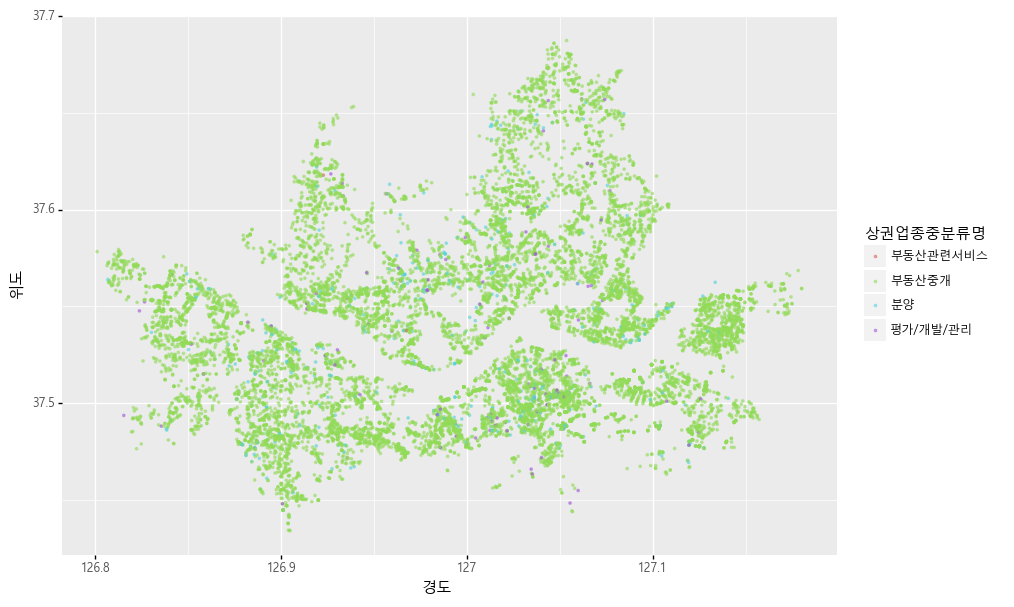

<ggplot: (131607951604)>

In [34]:
ggplot(shop_seoul_realty, aes(x='경도', y='위도', color='상권업종중분류명')) \
    + geom_point(size=0.5, alpha=0.5) \
    + theme(text=element_text(family=font_name), figure_size=(10, 7))

<AxesSubplot:xlabel='경도', ylabel='위도'>

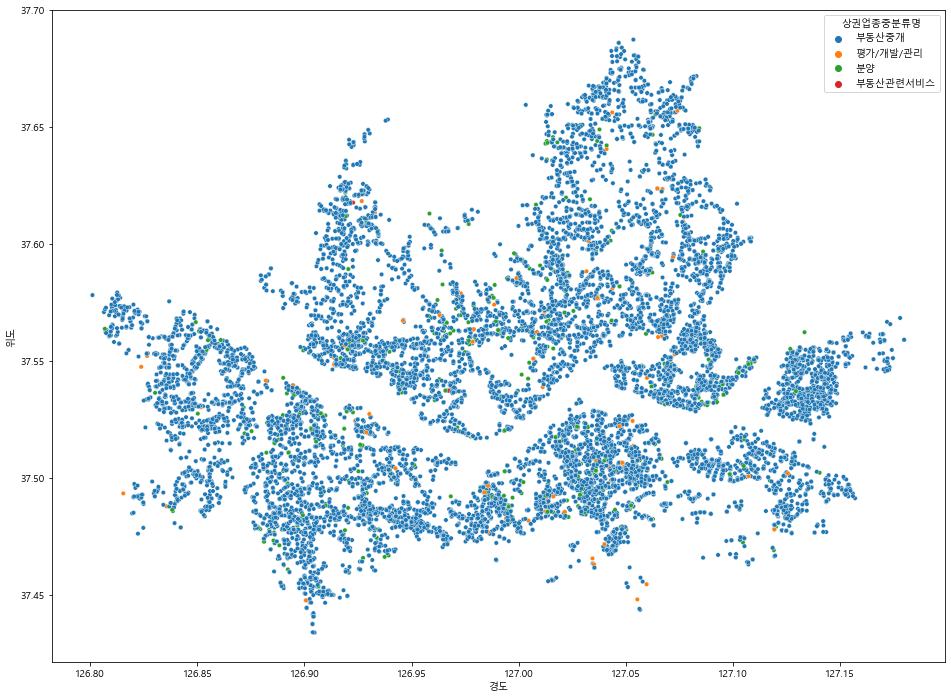

In [35]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=shop_seoul_realty, x='경도', y='위도', hue='상권업종중분류명', s=20)

In [36]:
# 학원-컴퓨터
shop_seoul_edu_computer = shop_seoul[shop_seoul['상권업종중분류명'] == '학원-컴퓨터']
shop_seoul_edu_computer

상호명       지점명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명  시군구명    행정동명  \
442       아이비씨에듀케이션       NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시   은평구    불광1동   
2687    서원초등학교컴퓨터교실       NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시   서초구    반포1동   
3678       이찬진컴퓨터교실       NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시   성북구    정릉1동   
3872        백상컴퓨터학원       NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시   구로구    구로4동   
5517        보성컴퓨터학원       NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시   성북구    장위1동   
...             ...       ...      ...      ...      ...    ...   ...     ...   
499152        점프셈교실  피씨정비네트워크    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시   마포구     합정동   
499153        점프셈교실      왕컴퓨터    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시   은평구    응암3동   
499154        점프셈교실    벽산정보처리    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시   노원구  상계6.7동   
499155        점프셈교실  신촌아이디컴퓨터    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  서대문구     신촌동   
499156        점프셈교실     영명컴퓨터    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시   마포구     아현동   

       법정동명                  지번주소                 도로명주소          경도  \
442     불광동   서울특별시 은평구 불광동 272-2      서울특별시 은평구 불광로 51  126.930696   
2687    반포동    서울특별시 서초구 반포동 30-8     서울특별시 서초구 고무래로 63  127.014605   
3678    정릉동  서울특별시 성북구 정릉동 16-282  서울특별시 성북구 정릉로38다길 29  127.017025   
3872    구로동     서울특별시 구로구 구로동 314  서울특별시 구로구 구로중앙로7길 28  126.889592   
5517    장위동  서울특별시 성북구 장위동 230-91   서울특별시 성북구 장위로15길 16  127.041859   
...     ...                   ...                   ...         ...   
499152  합정동  서울특별시 마포구 합정동 412-20    서울특별시 마포구 독막로 33-1  126.917321   
499153  응암동  서울특별시 은평구 응암동 576-48     서울특별시 은평구 응암로 204  126.917419   
499154  상계동   서울특별시 노원구 상계동 763-4    서울특별시 노원구 동일로 1335  127.062251   
499155  창천동  서울특별시 서대문구 창천동 20-44    서울특별시 서대문구 신촌로 117  126.938941   
499156  공덕동  서울특별시 마포구 공덕동 249-12    서울특별시 마포구 마포대로8길 9  126.953922   

               위도     시도    구군  
442     37.613419  서울특별시   은평구  
2687    37.502429  서울특별시   서초구  
3678    37.601564  서울특별시   성북구  
3872    37.491327  서울특별시   구로구  
5517    37.614905  서울특별시   성북구  
...           ...    ...   ...  
499152  37.548368  서울특별시   마포구  
499153  37.590132  서울특별시   은평구  
499154  37.647993  서울특별시   노원구  
499155  37.556025  서울특별시  서대문구  
499156  37.546617  서울특별시   마포구  

[215 rows x 15 columns]

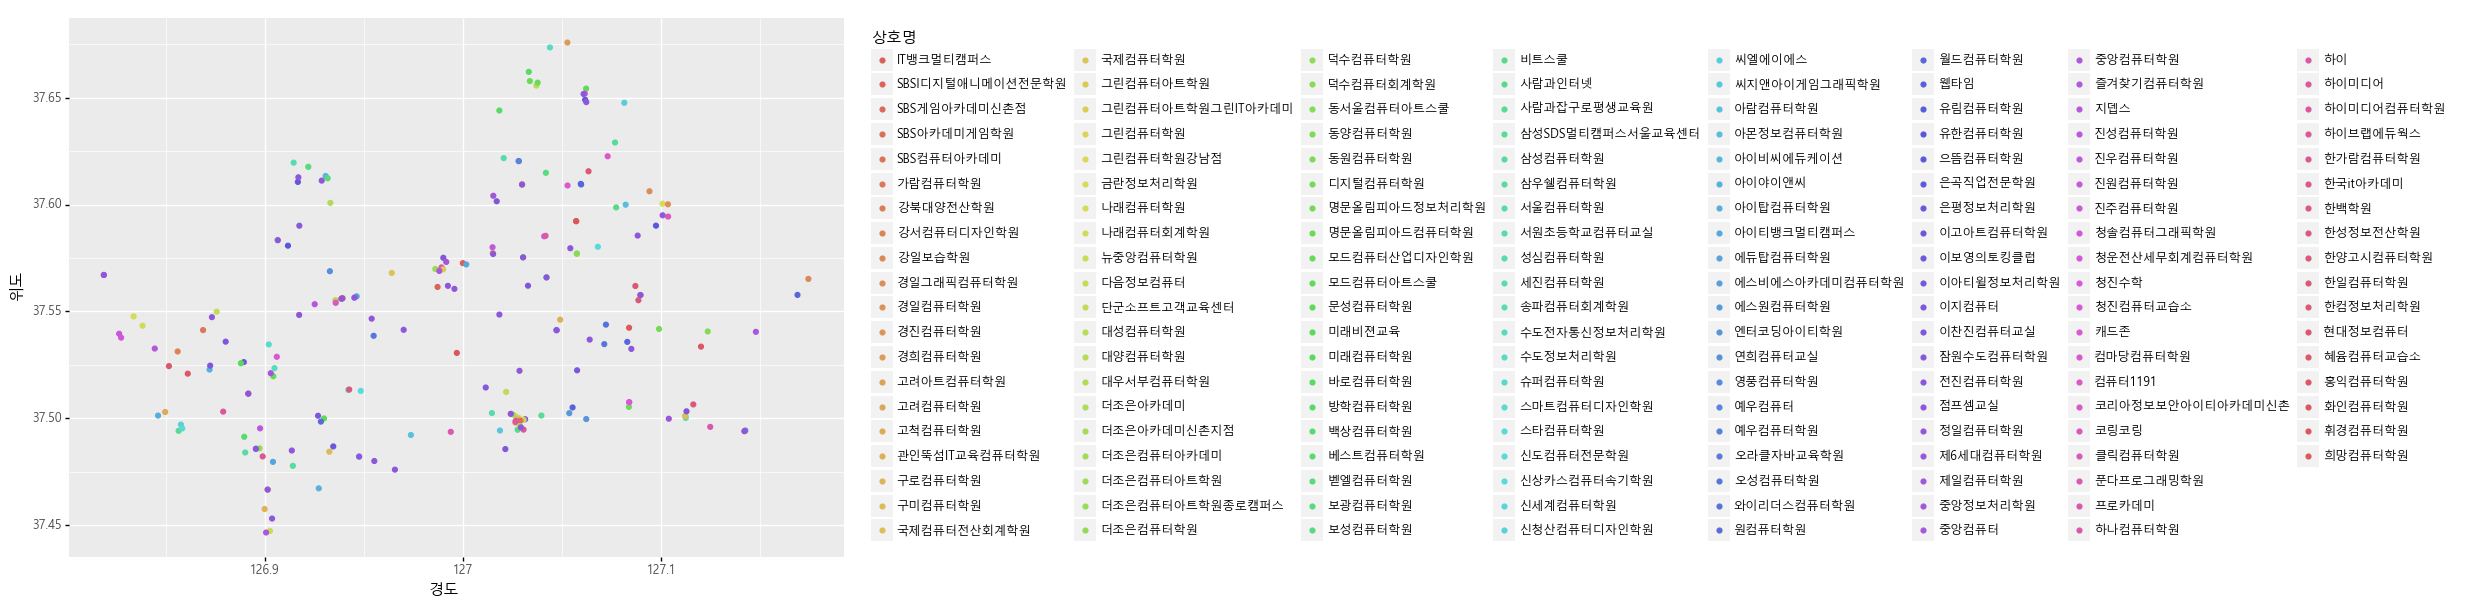

<ggplot: (131610227944)>

In [38]:
ggplot(shop_seoul_edu_computer, aes(x='경도', y='위도', color='상호명')) \
    + geom_point() \
    + theme(text=element_text(family=font_name), figure_size=(10, 7))

<AxesSubplot:xlabel='경도', ylabel='위도'>

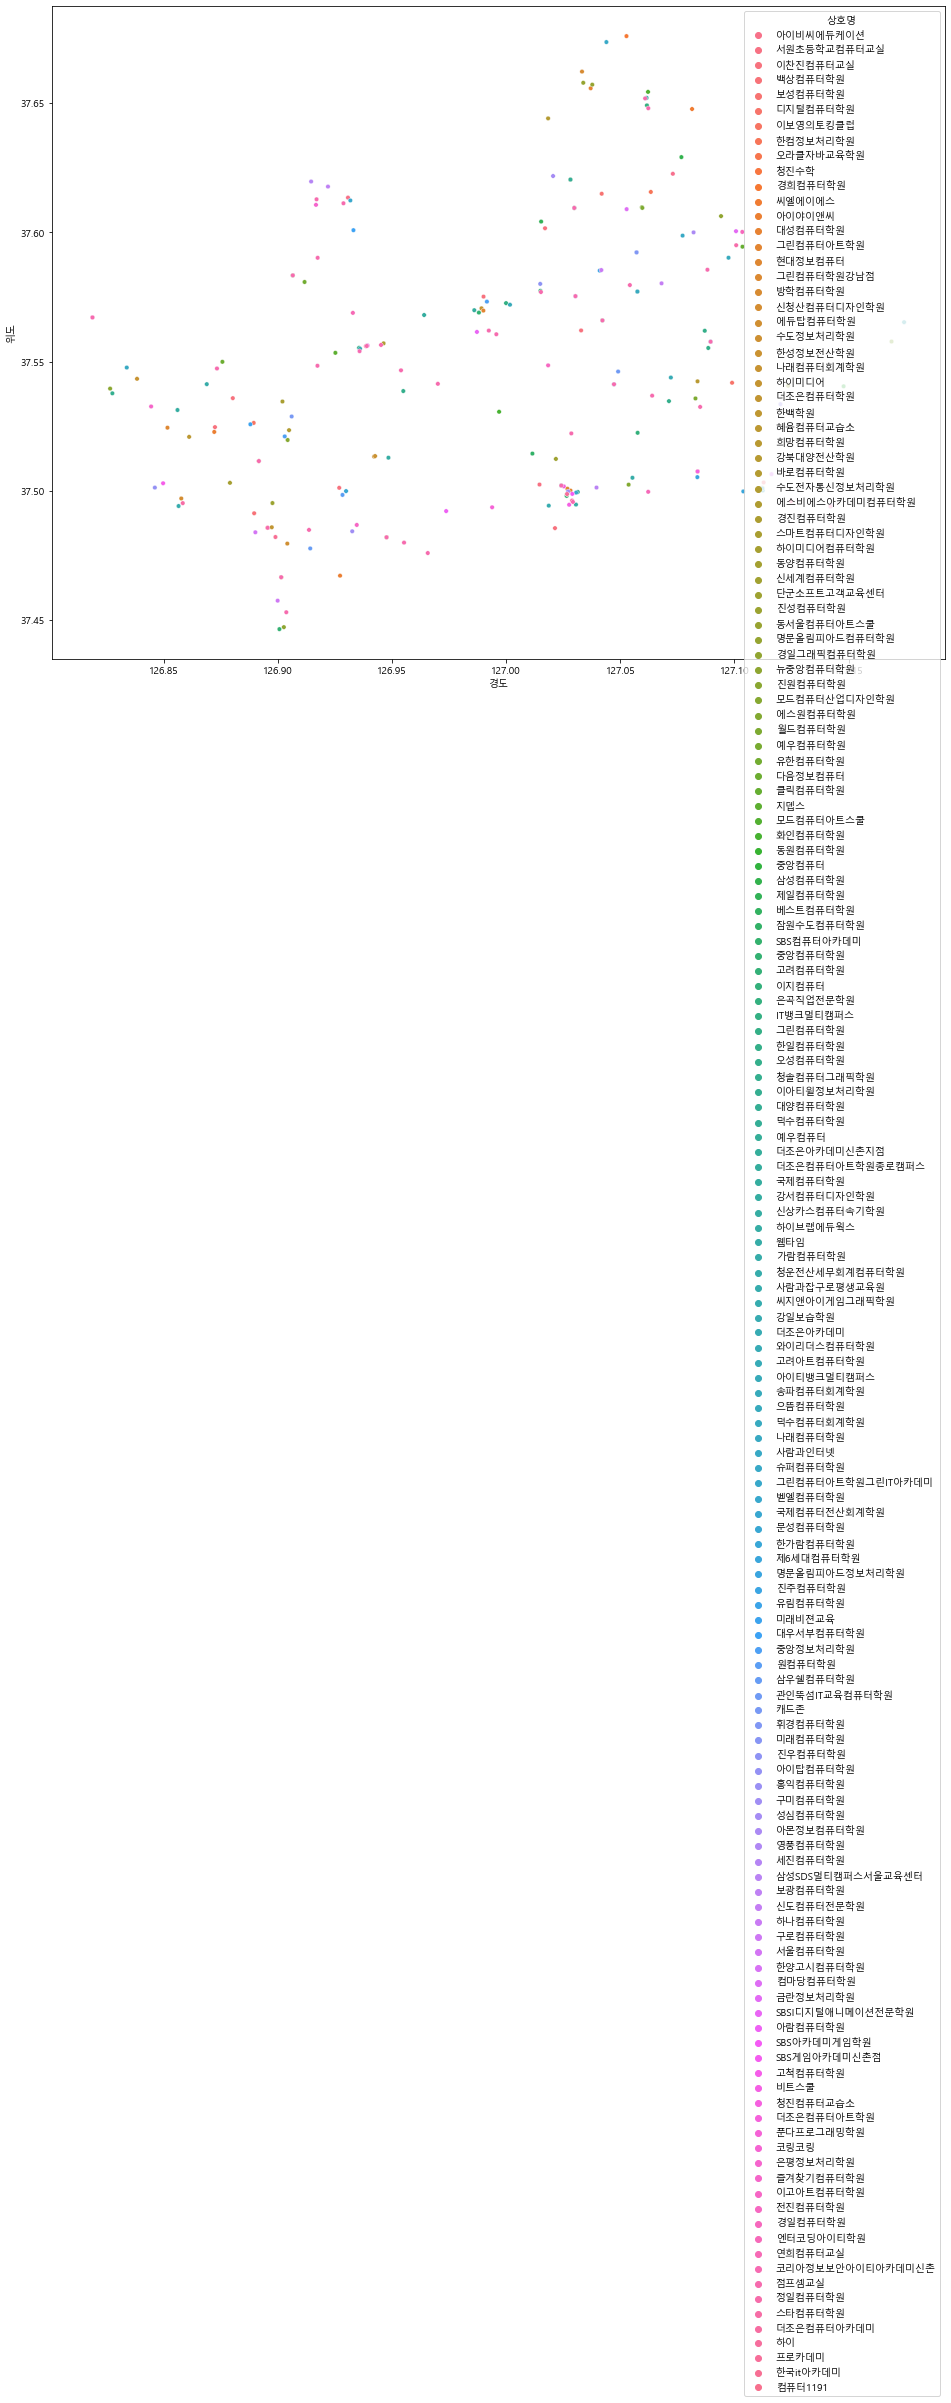

In [39]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=shop_seoul_edu_computer, x='경도', y='위도', hue='상호명', s=20)

In [40]:
import folium

In [41]:
data = shop_seoul_edu_computer
edu_map = folium.Map(location=[data['위도'].mean(), data['경도'].mean()], zoom_start=12, tiles='Stamen Terrain')
#중심지를 알아내기위해 경도와 위도ㄹ의 평균을 구한다
for i in data.index:
    edu_name = data.loc[i, '상호명'] + ' - ' + data.loc[i, '도로명주소']
    popup = folium.Popup(edu_name, max_width=200)
    folium.Marker(location=[data.loc[i, '위도'], data.loc[i, '경도']], popup=popup).add_to(edu_map)

edu_map.save('edu_map.html')
edu_map